In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
radiograph_data = pd.read_csv("../data/cxr-record-list.csv")
radio_report_data = pd.read_csv("../data/cxr-study-list.csv")
admissions_data = pd.read_csv("../data/admissions.csv")
patients_data = pd.read_csv("../data/patients.csv")

In [81]:
# removed language since data contained - "ENGLISH" and "?"
admissions_data = admissions_data[["subject_id","marital_status","race"
                                   ]].drop_duplicates(keep="first").reset_index(drop=True)

In [82]:
radiograph_data = radiograph_data.rename(columns={"path": "radiograph_path"})
radio_report_data = radio_report_data.rename(columns={"path": "radio_report_path"})

In [83]:
def basic(data):
    print("Unique Values Count where number of rows - " + str(data.shape[0]))
    for i in range(len(data.columns)):
        print(data.columns[i] + ": " + str(data[data.columns[i]].nunique()))
    print("\n")

basic(radiograph_data)
basic(radio_report_data)
basic(admissions_data)
basic(patients_data)

Unique Values Count where number of rows - 377110
subject_id: 65379
study_id: 227835
dicom_id: 377110
radiograph_path: 377110


Unique Values Count where number of rows - 227835
subject_id: 65379
study_id: 227835
radio_report_path: 227835


Unique Values Count where number of rows - 195956
subject_id: 180733
marital_status: 4
race: 33


Unique Values Count where number of rows - 299712
subject_id: 299712
gender: 2
anchor_age: 73
anchor_year: 99
anchor_year_group: 5
dod: 19041




In [84]:
for i in range(1,len(admissions_data.columns)):
    col = admissions_data.columns[i]
    print(admissions_data[col].value_counts())
    print("\n") 

marital_status
MARRIED     83999
SINGLE      72540
WIDOWED     18494
DIVORCED    12990
Name: count, dtype: int64


race
WHITE                                        121045
BLACK/AFRICAN AMERICAN                        20971
OTHER                                          9389
UNKNOWN                                        9024
HISPANIC OR LATINO                             3990
ASIAN                                          3770
WHITE - OTHER EUROPEAN                         3740
HISPANIC/LATINO - PUERTO RICAN                 3235
ASIAN - CHINESE                                2752
BLACK/CAPE VERDEAN                             2064
HISPANIC/LATINO - DOMINICAN                    1997
WHITE - RUSSIAN                                1974
UNABLE TO OBTAIN                               1337
PATIENT DECLINED TO ANSWER                     1275
BLACK/AFRICAN                                  1263
BLACK/CARIBBEAN ISLAND                         1200
ASIAN - SOUTH EAST ASIAN                        

In [85]:
radiology = radiograph_data.merge(radio_report_data, how='left', on=['subject_id',"study_id"])
radiology.head(20)

,subject_id,study_id,dicom_id,radiograph_path,radio_report_path
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...,files/p10/p10000032/s50414267.txt
1,10000032,50414267,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...,files/p10/p10000032/s50414267.txt
2,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,files/p10/p10000032/s53189527.txt
3,10000032,53189527,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...,files/p10/p10000032/s53189527.txt
4,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...,files/p10/p10000032/s53911762.txt
5,10000032,53911762,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,files/p10/p10000032/s53911762.txt
6,10000032,56699142,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,files/p10/p10000032/s56699142.txt
7,10000764,57375967,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,files/p10/p10000764/s57375967/096052b7-d256dc4...,files/p10/p10000764/s57375967.txt
8,10000764,57375967,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,files/p10/p10000764/s57375967.txt
9,10000764,57375967,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,files/p10/p10000764/s57375967.txt


In [86]:
patients_info = admissions_data.merge(patients_data, how='left', on=['subject_id']).drop_duplicates(keep="first")
patients_info.head(20)

,subject_id,marital_status,race,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,WIDOWED,WHITE,F,52,2180,2014 - 2016,2180-09-09
1,10000068,SINGLE,WHITE,F,19,2160,2008 - 2010,NaN
2,10000084,MARRIED,WHITE,M,72,2160,2017 - 2019,2161-02-13
3,10000108,SINGLE,WHITE,M,25,2163,2014 - 2016,NaN
4,10000117,DIVORCED,WHITE,F,48,2174,2008 - 2010,NaN
5,10000248,MARRIED,WHITE,M,34,2192,2014 - 2016,NaN
6,10000280,NaN,OTHER,M,20,2151,2008 - 2010,NaN
7,10000560,MARRIED,WHITE,F,53,2189,2008 - 2010,NaN
8,10000635,WIDOWED,BLACK/AFRICAN AMERICAN,F,74,2136,2014 - 2016,NaN
9,10000719,SINGLE,WHITE,F,34,2140,2008 - 2010,NaN


In [88]:
final_df = radiology.merge(patients_info, how='left', on=['subject_id']).drop_duplicates(keep="first")
final_df.head(20)

,subject_id,study_id,dicom_id,radiograph_path,radio_report_path,marital_status,race,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...,files/p10/p10000032/s50414267.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
1,10000032,50414267,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...,files/p10/p10000032/s50414267.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
2,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,files/p10/p10000032/s53189527.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
3,10000032,53189527,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...,files/p10/p10000032/s53189527.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
4,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...,files/p10/p10000032/s53911762.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
5,10000032,53911762,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,files/p10/p10000032/s53911762.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
6,10000032,56699142,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,files/p10/p10000032/s56699142.txt,WIDOWED,WHITE,F,52.0,2180.0,2014 - 2016,2180-09-09
7,10000764,57375967,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,files/p10/p10000764/s57375967/096052b7-d256dc4...,files/p10/p10000764/s57375967.txt,SINGLE,WHITE,M,86.0,2132.0,2014 - 2016,NaN
8,10000764,57375967,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,files/p10/p10000764/s57375967.txt,SINGLE,WHITE,M,86.0,2132.0,2014 - 2016,NaN
9,10000764,57375967,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,files/p10/p10000764/s57375967.txt,SINGLE,WHITE,M,86.0,2132.0,2014 - 2016,NaN


Text(0, 0.5, '')

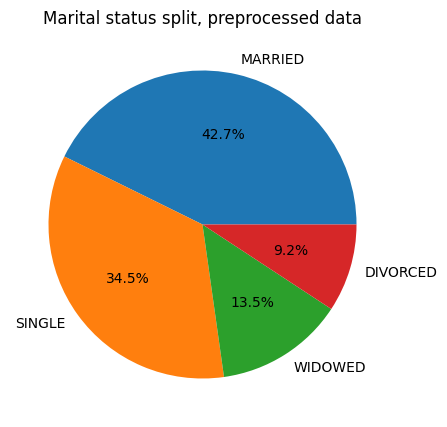

In [90]:
fig = plt.figure(figsize=(5,5))
final_df.marital_status.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Marital status split, preprocessed data')
plt.ylabel('')


Text(0, 0.5, '')

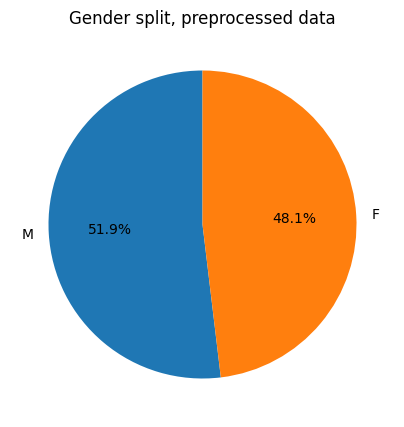

In [91]:
fig = plt.figure(figsize=(5,5))
final_df.gender.value_counts().plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title('Gender split, preprocessed data')
plt.ylabel('')


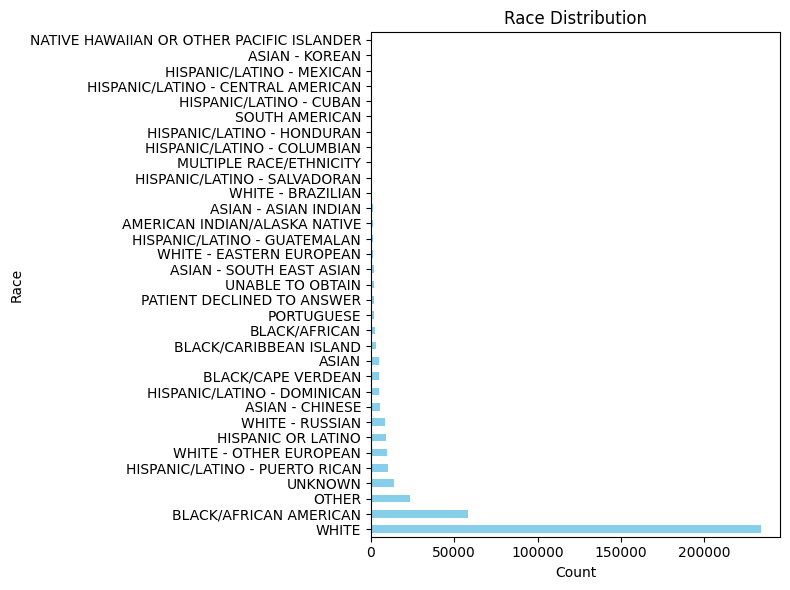

In [96]:
 
race_counts = final_df['race'].value_counts()
 
 
plt.figure(figsize=(8, 6))
race_counts.plot(kind='barh', color='skyblue')
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.tight_layout()
plt.show()


In [97]:
final_df['race'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
final_df['race'].replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)
final_df['race'].replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)
final_df['race'].replace(regex=r'^BLACK\D*', value='BLACK/AFRICAN AMERICAN', inplace=True)
final_df['race'].replace(['UNABLE TO OBTAIN', 'OTHER', 'PATIENT DECLINED TO ANSWER', 
                         'UNKNOWN/NOT SPECIFIED'], value='OTHER/UNKNOWN', inplace=True)

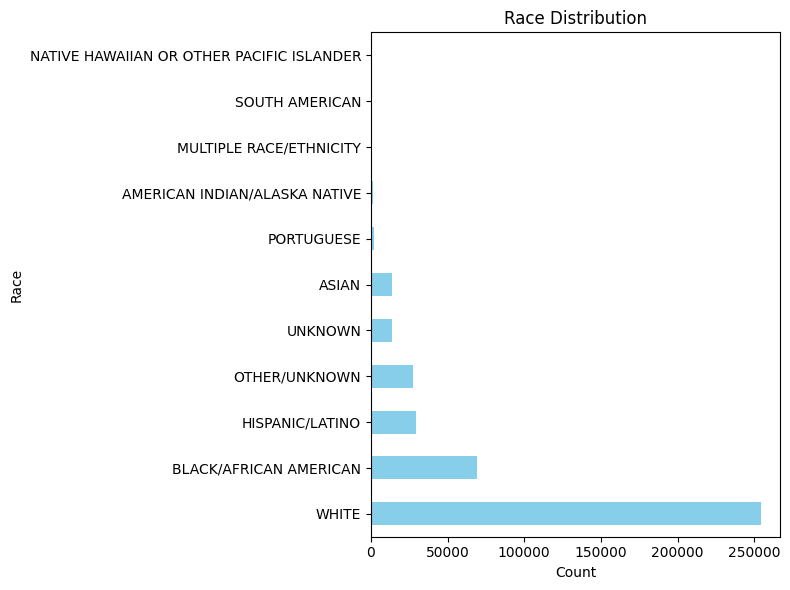

In [98]:
race_counts = final_df['race'].value_counts()
 
 
plt.figure(figsize=(8, 6))
race_counts.plot(kind='barh', color='skyblue')
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.tight_layout()
plt.show()
